# Importing Libraries and Files


In [1]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('E:\Projects\Image Analysis for MRI Based Brain Tumor Detection\brain tumor\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import keras

from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout



In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['no','yes']
for i in labels:
    folderPath = os.path.join('E:\\Projects\\Image Analysis for MRI Based Brain Tumor Detection\\brain tumor\\datasets',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('E:\\Projects\\Image Analysis for MRI Based Brain Tumor Detection\\brain tumor\\datasets',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(6000, 150, 150, 3)

Train - Test Split


In [6]:
print(X_train.shape)
print(Y_train.shape)


(6000, 150, 150, 3)
(6000,)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network (CNN)

In [42]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))


In [43]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 128)      

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,epochs=20,validation_data= (X_test,y_test) ,validation_split=0.1)

Epoch 1/10


169/169 [==============================] - 55s 316ms/step - loss: 14.6871 - accuracy: 0.7396 - val_loss: 0.4749 - val_accuracy: 0.8133
Epoch 2/10
169/169 [==============================] - 48s 285ms/step - loss: 0.3595 - accuracy: 0.8424 - val_loss: 0.3311 - val_accuracy: 0.9100
Epoch 3/10
169/169 [==============================] - 48s 286ms/step - loss: 0.2270 - accuracy: 0.9067 - val_loss: 0.2273 - val_accuracy: 0.9333
Epoch 4/10
169/169 [==============================] - 50s 295ms/step - loss: 0.1483 - accuracy: 0.9428 - val_loss: 0.0986 - val_accuracy: 0.9750
Epoch 5/10
169/169 [==============================] - 51s 299ms/step - loss: 0.1071 - accuracy: 0.9648 - val_loss: 0.1243 - val_accuracy: 0.9783
Epoch 6/10
169/169 [==============================] - 56s 334ms/step - loss: 0.0945 - accuracy: 0.9676 - val_loss: 0.0744 - val_accuracy: 0.9800
Epoch 7/10
169/169 [==============================] - 57s 337ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0285 - val

Plotting Graphs to visualize loss


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

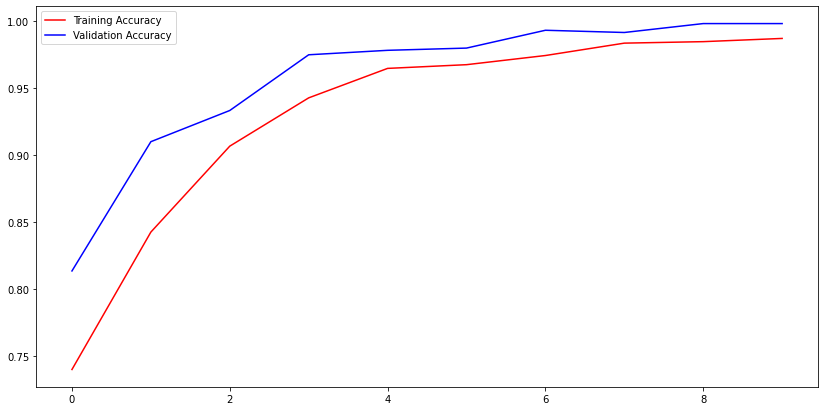

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

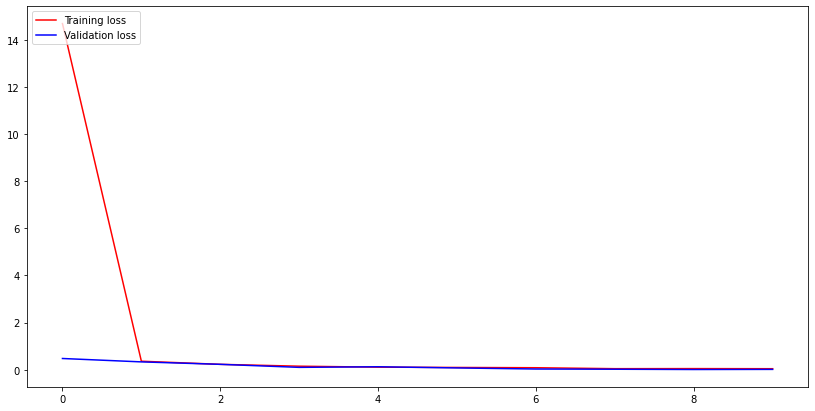

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Testing the Model 

In [49]:
img = cv2.imread(r"E:\Projects\Image Analysis for MRI Based Brain Tumor Detection\brain tumor\datasets\yes\y42.jpg")

if img is not None:
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print(img_array.shape)
else:
    print("Failed to load the image.")

img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)


(150, 150, 3)

In [50]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

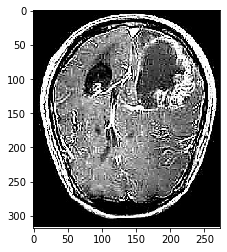

In [51]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"E:\Projects\Image Analysis for MRI Based Brain Tumor Detection\brain tumor\datasets\yes\y42.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [52]:
pred = model.predict(img_array)
img_pred = pred.argmax()
if(img_pred == 1):
    print("Tumor Detected")
else:
    print("Healthy Brain")    

1/1 [==============================] - 0s 122ms/step
Tumor Detected
